# The Sparks Foundation #GRIPJULY21

## Task 1 - Prediction Using Supervised ML

## Name : Akhil Ghanekar 

### Predicting the percentage of the students based upon the number of study hours according to the dataset provided 

In [40]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

In [5]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Visualization 

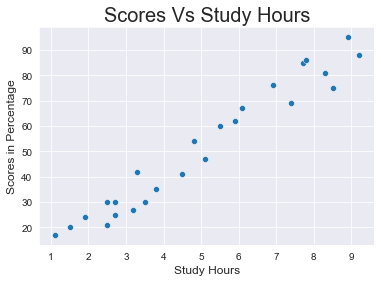

In [7]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Scores Vs Study Hours',size=20)
plt.ylabel('Scores in Percentage', size=12)
plt.xlabel('Study Hours', size=12)
plt.show()

###  Regression Line to confirm the correlation 

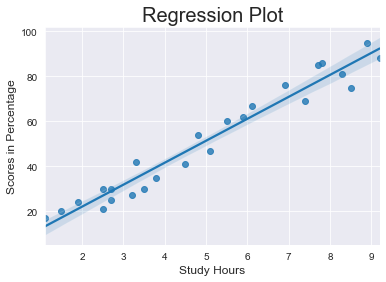

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Scores in Percentage', size=12)
plt.xlabel('Study Hours', size=12)
plt.show()
print(data.corr())

### From the regression line above we can say that there is a positive correlation between the variables  

### Training the Regression Model 

In [11]:
#Data Splitting 
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
print("Now fitting the data into the regression model")

Now fitting the data into the regression model


In [10]:
#Fitting the Data 
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Training Done")

Training Done


### Predictions 

In [13]:
predict_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in predict_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Actual Score vs Predicted Score

In [14]:
comp_scores = pd.DataFrame({'Actual Score': val_y, 'Predicted Score': predict_y})
comp_scores

,Actual Score,Predicted Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


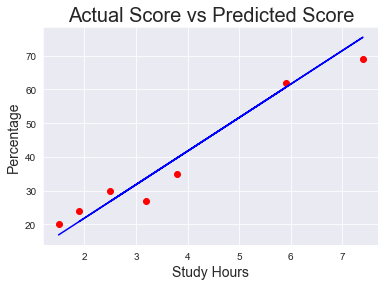

In [19]:
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, predict_y, color='Blue')
plt.title('Actual Score vs Predicted Score', size=20)
plt.ylabel('Percentage', size=14)
plt.xlabel('Study Hours', size=14)
plt.show()

### Evaluation and Checking the Efficiency  

In [30]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,predict_y))

Mean absolute error:  4.130879918502486


In [31]:
# Efficiency 
v=metrics.r2_score(val_y,predict_y)
print(v)

0.9367661043365055


### From the above calculations we can say that the chances of getting an error are very less in this regression model 

### Predicting percentage for a student studying 9.25 hours per day   

In [53]:
print('Score of the student :', regression.predict([[9.25]]))

Score of the student : [93.89272889]


### Percentage of student studying for 9.25 hours per day is 93.89 according to this regression model  